## **IMPORTING THE LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score,classification_report,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# **READ DATASETS**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
fake = pd.read_csv("/content/drive/MyDrive/Dataset/fake news detection/Fake.csv")
true = pd.read_csv("/content/drive/MyDrive/Dataset/fake news detection/True.csv")

In [ ]:
fake.shape

(23481, 4)

In [ ]:
true.shape

(21417, 4)

# **DATA CLEANING AND PREPARATION**

In [ ]:
fake['target'] = 0
true['target'] = 1

In [ ]:
fake.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [ ]:
true.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [ ]:
data = pd.concat([fake,true]).reset_index(drop = True)
data.shape

(44898, 5)

In [ ]:
data.head(5)

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [ ]:
data.tail(5)

,title,text,subject,date,target
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
44897,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [ ]:
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [ ]:
data.head()

,title,text,subject,date,target
0,Dutchman put on trial for Ethiopian war crimes...,AMSTERDAM (Reuters) - A Dutch citizen will go ...,worldnews,"October 24, 2017",1
1,"Trump softens immigration stance, takes measur...",WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"February 28, 2017",1
2,Reporter files criminal charge of battery agai...,(Reuters) - A reporter for the conservative we...,politicsNews,"March 11, 2016",1
3,The HORRIFYING Reality Of Executions In This ...,"According to Reuters, a grand jury in Oklahoma...",News,"May 20, 2016",0
4,Two Russian soldiers killed by shelling in Syr...,MOSCOW (Reuters) - Two Russian servicemen have...,worldnews,"September 4, 2017",1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   target   44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [ ]:
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,Dutchman put on trial for Ethiopian war crimes...,AMSTERDAM (Reuters) - A Dutch citizen will go ...,worldnews,1
1,"Trump softens immigration stance, takes measur...",WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,1
2,Reporter files criminal charge of battery agai...,(Reuters) - A reporter for the conservative we...,politicsNews,1
3,The HORRIFYING Reality Of Executions In This ...,"According to Reuters, a grand jury in Oklahoma...",News,0
4,Two Russian soldiers killed by shelling in Syr...,MOSCOW (Reuters) - Two Russian servicemen have...,worldnews,1


In [ ]:
# Removing the title
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,AMSTERDAM (Reuters) - A Dutch citizen will go ...,worldnews,1
1,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,1
2,(Reuters) - A reporter for the conservative we...,politicsNews,1
3,"According to Reuters, a grand jury in Oklahoma...",News,0
4,MOSCOW (Reuters) - Two Russian servicemen have...,worldnews,1


In [ ]:
# Convert to lowercase

data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,amsterdam (reuters) - a dutch citizen will go ...,worldnews,1
1,washington (reuters) - president donald trump ...,politicsNews,1
2,(reuters) - a reporter for the conservative we...,politicsNews,1
3,"according to reuters, a grand jury in oklahoma...",News,0
4,moscow (reuters) - two russian servicemen have...,worldnews,1


In [ ]:
# Remove punctuation

import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [ ]:
def remove_numbers(text):
    numbers='0123456789'
    all_list = [char for char in text if char not in numbers]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(remove_numbers)
data.head()

,text,subject,target
0,amsterdam reuters a dutch citizen will go on ...,worldnews,1
1,washington reuters president donald trump tol...,politicsNews,1
2,reuters a reporter for the conservative websi...,politicsNews,1
3,according to reuters a grand jury in oklahoma ...,News,0
4,moscow reuters two russian servicemen have be...,worldnews,1


In [ ]:
# Check
data.head()

,text,subject,target
0,amsterdam reuters a dutch citizen will go on ...,worldnews,1
1,washington reuters president donald trump tol...,politicsNews,1
2,reuters a reporter for the conservative websi...,politicsNews,1
3,according to reuters a grand jury in oklahoma ...,News,0
4,moscow reuters two russian servicemen have be...,worldnews,1


In [ ]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Stemming
from nltk.stem.porter import PorterStemmer
porter=PorterStemmer()
def stemSentence(txt):
  token_words=txt.split()
  filtered_txt=' '.join([porter.stem(word) for word in token_words])
  return filtered_txt
#df.features=df.features.apply(lambda x:stemSentence(x))
data['text'] = data['text'].apply(lambda x:stemSentence(x))

In [ ]:
#Lemmatization
# import nltk
# nltk.download('wordnet')
# from nltk.stem import WordNetLemmatizer
# w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
# lemmatizer = WordNetLemmatizer()
# def lemmatize_text(text):
#   return [lemmatizer.lemmatize(word,'v') for word in w_tokenizer.tokenize(text)]
# data['text']=data['text'].apply(lambda x:lemmatize_text(x))

In [ ]:
data.head()

,text,subject,target
0,amsterdam reuter dutch citizen go trial nether...,worldnews,1
1,washington reuter presid donald trump told con...,politicsNews,1
2,reuter report conserv websit breitbart news fi...,politicsNews,1
3,accord reuter grand juri oklahoma found jail s...,News,0
4,moscow reuter two russian servicemen kill deir...,worldnews,1


**INFERENCE :-**

**Merged the two datasets Fake and True.As a part of data cleaning and preprocessing,we have dropped unneccessary columns and conversion of text to lowercase,removing numbers,punctuations,stopwords and stemming of text is done using natural language tool kit(nltk).**

# **BASIC DATA EXPLORATION**

##**BAG OF WORDS**

In [ ]:
all_words = ' '.join([text for text in data.text])
def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return counts
word_count(all_words)

{'amsterdam': 72,
 'reuter': 28675,
 'dutch': 287,
 'citizen': 4780,
 'go': 23501,
 'trial': 1781,
 'netherland': 218,
 'next': 8690,
 'monday': 9115,
 'charg': 7259,
 'commit': 4609,
 'war': 9664,
 'crime': 4651,
 'ethiopia': 97,
 'yearold': 4071,
 'dutchman': 4,
 'born': 1432,
 'accus': 8246,
 'incarcer': 170,
 'tortur': 838,
 'murder': 2894,
 'oppon': 2090,
 'former': 17684,
 'ethiopian': 54,
 'leader': 14629,
 'mengistu': 16,
 'hail': 388,
 'mariam': 10,
 'late': 3697,
 'repres': 9462,
 'provinc': 1481,
 'gojjam': 2,
 'man': 8034,
 'order': 10866,
 'kill': 9591,
 'young': 3756,
 'prison': 2979,
 'respons': 8649,
 'inhuman': 118,
 'treatment': 1376,
 'peopl': 40720,
 'court': 15535,
 'sentenc': 2365,
 'death': 4999,
 'absentia': 35,
 'role': 4422,
 'call': 24516,
 'red': 1694,
 'terror': 4368,
 'communist': 1312,
 'militari': 11564,
 'junta': 97,
 'conduct': 3122,
 'ouster': 137,
 'emperor': 122,
 'selassi': 4,
 'carri': 4191,
 'make': 23011,
 'new': 30874,
 'best': 4098,
 'option':

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


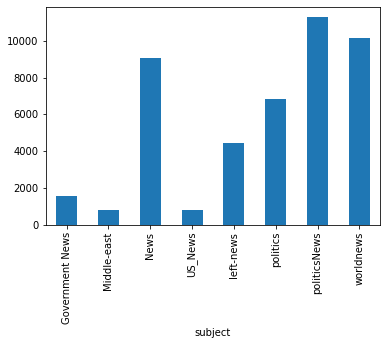

In [ ]:
# How many articles per subject?
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
0    23481
1    21417
Name: text, dtype: int64


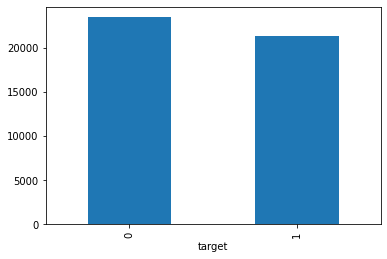

In [ ]:
# How many fake and real articles?
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

## **WORD CLOUD**

In [ ]:
!pip install wordcloud

### Word cloud for fake news

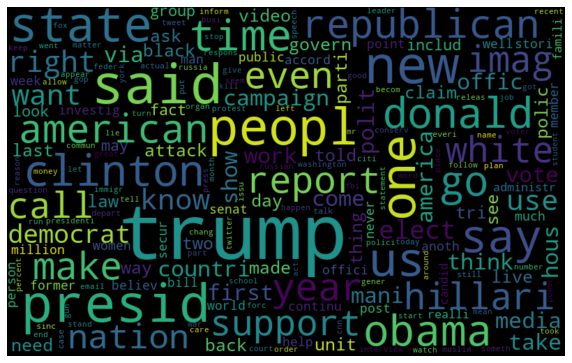

In [ ]:
# Word cloud for fake news
from wordcloud import WordCloud

fake_data = data[data["target"] == 0]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Word cloud for real news

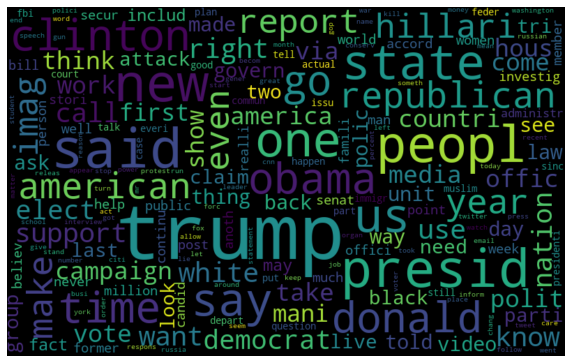

In [ ]:
# Word cloud for real news
from wordcloud import WordCloud

real_data = data[data["target"] == 1]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##**FREQUENCY**

In [ ]:
# Most frequent words counter   
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

###Most frequent words in fake news

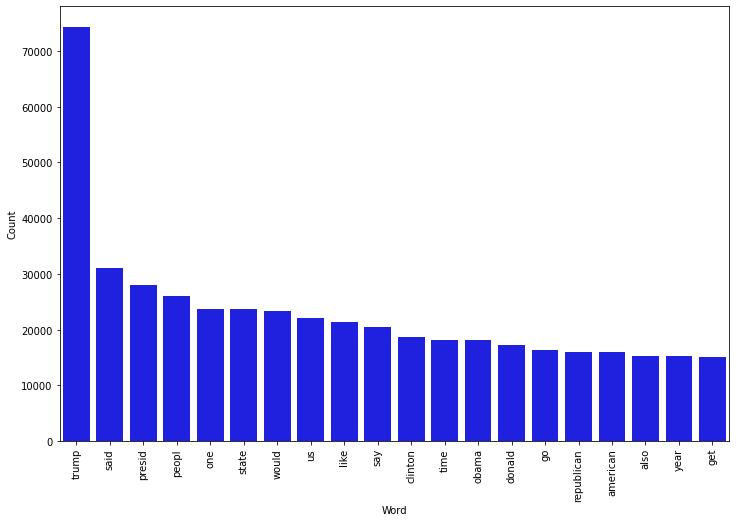

In [ ]:
# Most frequent words in fake news
counter(data[data["target"] == 0], "text", 20)

### Most frequent words in real news

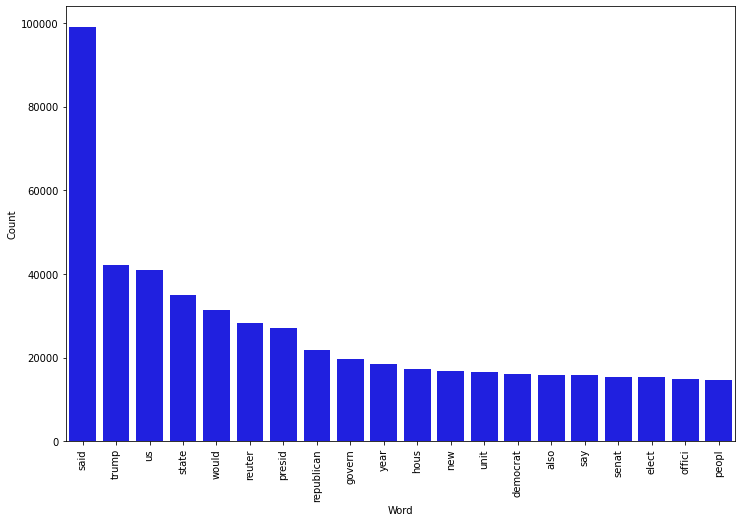

In [ ]:
# Most frequent words in real news
counter(data[data["target"] == 1], "text", 20)

**INFERENCE :-**

**In the EDA,we have printed the bag of words,some bar graphs based on frequent words and to show the class labels count.Word cloud of all words are printed by importing Wordcloud library.**

# **MODELLING**

In [ ]:
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## **SPLIT DATA**

In [ ]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

In [ ]:
X_train.head()

36335    pure gold ultim racebaiterinchief got call pho...
12384    washington reuter presid donald trump’ call us...
24419                                         spirit debat
24740    secret team trump tizzi jill stein recount att...
27039    new york reuter republican presidenti candid d...
Name: text, dtype: object

In [ ]:
y_train.head()

36335    0
12384    1
24419    0
24740    0
27039    1
Name: target, dtype: int64

In [ ]:
accuracies = {}

Dataset split is in the ratio of train set(80) and test set(20) using the hold out method.

## **LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
accuracies['logistic regression'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 98.83%


In [ ]:
print(classification_report(prediction,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4599
           1       0.99      0.99      0.99      4381

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



Confusion matrix, without normalization


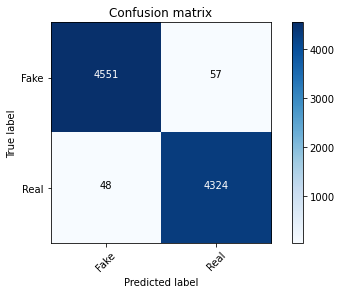

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

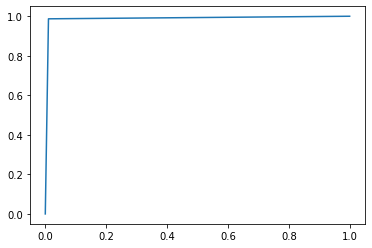

In [ ]:
fpr,tpr,thresholds=roc_curve(prediction,y_test)
plt.plot(fpr,tpr)

In [ ]:
roc_auc_score(prediction,y_test)

0.9882761101613994

**INFERENCE :-**

**Logistic Regression algorithm gave an accuracy,precision,recall,f1 score,auc score of 98.84%,0.99,0.99,0.99,0.988 respectively.**

## **KNN CLASSIFIER**



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
maxacc=[]
for i in range(1,20,2):
  pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', KNeighborsClassifier(n_neighbors = i))])  
  # Fitting the model
  model = pipe.fit(X_train, y_train)

  # Accuracy
  prediction = model.predict(X_test)
  maxacc.append(round(accuracy_score(y_test, prediction)*100,2))

print("accuracy: {}%".format(maxacc))



accuracy: [79.14, 72.58, 68.65, 66.27, 64.61, 63.3, 61.98, 60.98, 60.48, 59.73]%


In [ ]:
print("Best hyperparameter(K-value)",np.argmax(maxacc)+1)

Best hyperparameter(K-value) 1


In [ ]:
print(maxacc)

[79.14, 72.58, 68.65, 66.27, 64.61, 63.3, 61.98, 60.98, 60.48, 59.73]


In [ ]:
#After finding best K-value

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', KNeighborsClassifier(n_neighbors = np.argmax(maxacc)+1))])  
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))  

accuracies['KNN'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 79.14%


In [ ]:
print(classification_report(prediction,y_test))

              precision    recall  f1-score   support

           0       0.96      0.73      0.83      6253
           1       0.60      0.94      0.73      2727

    accuracy                           0.79      8980
   macro avg       0.78      0.83      0.78      8980
weighted avg       0.85      0.79      0.80      8980



Confusion matrix, without normalization


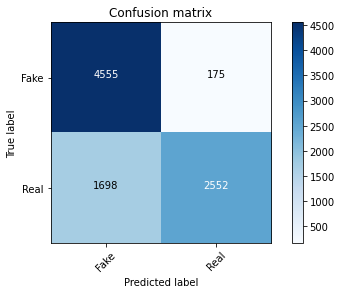

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

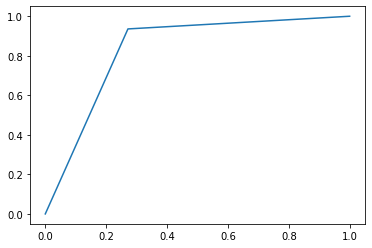

In [ ]:
fpr,tpr,thresholds=roc_curve(prediction,y_test)
plt.plot(fpr,tpr)

In [ ]:
roc_auc_score(prediction,y_test)

0.8321386299299476

**INFERENCE :-**

**Knn classifier algorithm gave an accuracy,precision,recall,f1 score,auc score of 79.44%,0.78,0.84,0.78,0.83  respectively.**

## **DECISION TREE CLASSIFIER**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracies['Decision Tree Classifier'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 99.63%


In [ ]:
#from sklearn.tree import export_graphviz 
  
#export_graphviz(model, out_file ='tree.dot',feature_names = X_train["subject"])

In [ ]:
print(classification_report(prediction,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4741
           1       0.99      1.00      1.00      4239

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



Confusion matrix, without normalization


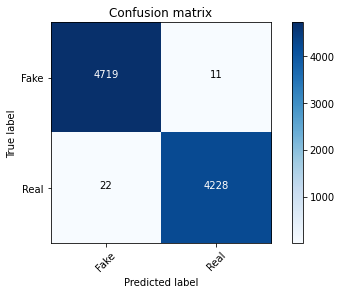

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

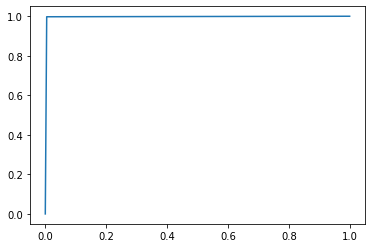

In [ ]:
fpr,tpr,thresholds=roc_curve(prediction,y_test)
plt.plot(fpr,tpr)

In [ ]:
roc_auc_score(prediction,y_test)

0.996382338565382

**INFERENCE :-**

**Decision Tree classifier algorithm gave an accuracy,precision,recall,f1 score,auc score of 99.73%,1.0,1.0,1.0,0.997 respectively.**

## **RANDOM FOREST CLASSIFIER**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(random_state=0))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracies['Random Forest Classifier'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 99.31%


In [ ]:
print(classification_report(prediction,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4716
           1       0.99      0.99      0.99      4264

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



Confusion matrix, without normalization


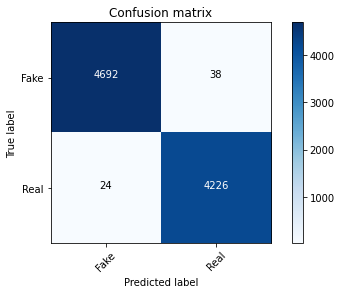

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

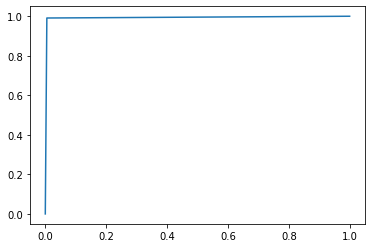

In [ ]:
fpr,tpr,thresholds=roc_curve(prediction,y_test)
plt.plot(fpr,tpr)

In [ ]:
roc_auc_score(prediction,y_test)

0.9929995607941986

**INFERENCE :-**

**Random Forest Classifier algorithm gave an accuracy,precision,recall,f1 score,auc score of 98.91%,0.99,0.99,0.99,0.988 respectively.**

## **NAIVE BAYES CLASSIFIER**

###**MULTINOMIAL**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', MultinomialNB())])  
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracies['Multinomial Naive Bayes'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 95.59%


In [ ]:
print(classification_report(prediction,y_test))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      4590
           1       0.97      0.94      0.95      4390

    accuracy                           0.96      8980
   macro avg       0.96      0.96      0.96      8980
weighted avg       0.96      0.96      0.96      8980



Confusion matrix, without normalization


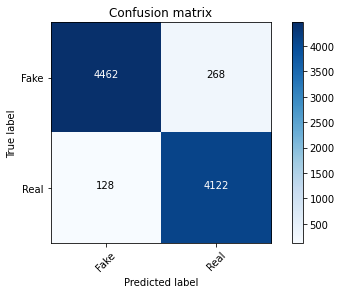

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

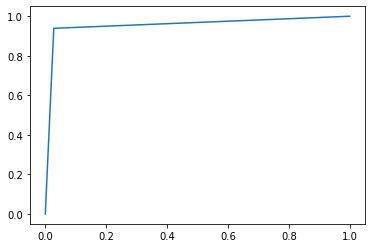

In [ ]:
fpr,tpr,thresholds=roc_curve(prediction,y_test)
plt.plot(fpr,tpr)

In [ ]:
roc_auc_score(prediction,y_test)

0.9555327268847301

**INFERENCE :-**

**Multinomial Naive Bayes algorithm gave an accuracy,precision,recall,f1 score,auc score of 95.17%,0.95,0.95,0.95,0.952 respectively.**


### **BERNOULII**

In [ ]:
from sklearn.naive_bayes import BernoulliNB

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', BernoulliNB())])  
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracies['Bernoulli Naive Bayes'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 98.24%


In [ ]:
print(classification_report(prediction,y_test))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4628
           1       0.99      0.97      0.98      4352

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980



Confusion matrix, without normalization


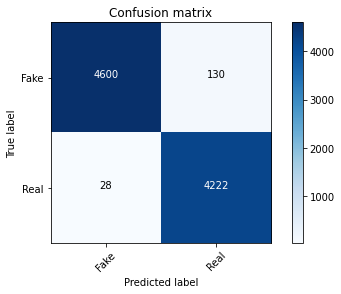

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

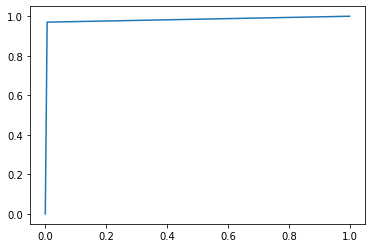

In [ ]:
fpr,tpr,thresholds=roc_curve(prediction,y_test)
plt.plot(fpr,tpr)

In [ ]:
roc_auc_score(prediction,y_test)

0.9820392734124765

**INFERENCE :-**

**Bernoulli Naive Bayes algorithm gave an accuracy,precision,recall,f1 score,auc score of 97.81%,0.98,0.98,0.98,0.977  respectively.**

## **SVM(Support Vector Machine)**

###**LINEAR**

In [ ]:
from sklearn.svm import SVC  

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model',SVC(kernel='linear'))])  
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracies['SVM(Linear)'] = round(accuracy_score(y_test, prediction)*100,2)


accuracy: 99.58%


In [ ]:
print(classification_report(prediction,y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4718
           1       1.00      0.99      1.00      4262

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



Confusion matrix, without normalization


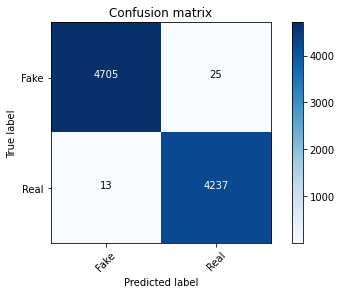

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

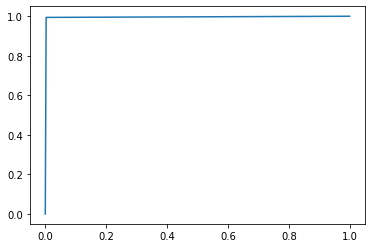

In [ ]:
fpr,tpr,thresholds=roc_curve(prediction,y_test)
plt.plot(fpr,tpr)

In [ ]:
roc_auc_score(prediction,y_test)

0.9956894022294281

**INFERENCE :-**

**SVM linear algorithm gave an accuracy,precision,recall,f1 score,auc score of 99.52%,1.0,1.0,1.0,0.995 respectively.**

###**POLYNOMIAL**

In [ ]:
from sklearn.svm import SVC  

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model',SVC(kernel='poly'))])  
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracies['SVM(Polynomial)'] = round(accuracy_score(y_test, prediction)*100,2)


In [ ]:
print(classification_report(prediction,y_test))

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [ ]:
fpr,tpr,thresholds=roc_curve(prediction,y_test)
plt.plot(fpr,tpr)

In [ ]:
roc_auc_score(prediction,y_test)

**INFERENCE :-**

**SVM polynomial algorithm gave an accuracy,precision,recall,f1 score,auc score of 95.5%,0.95,0.96,0.95,0.958 respectively.**


###**SIGMOID**

In [ ]:
from sklearn.svm import SVC  

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model',SVC(kernel='sigmoid'))])  
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracies['SVM(Sigmoid)'] = round(accuracy_score(y_test, prediction)*100,2)


In [ ]:
print(classification_report(prediction,y_test))

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [ ]:
fpr,tpr,thresholds=roc_curve(prediction,y_test)
plt.plot(fpr,tpr)

In [ ]:
roc_auc_score(prediction,y_test)

**INFERENCE :-**

**SVM sigmoid algorithm gave an accuracy,precision,recall,f1 score,auc score of 99.44%,0.99,0.99,0.99,0.994  respectively.**

###**RBF(Radial Basis Function)**

In [ ]:
from sklearn.svm import SVC  

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model',SVC(kernel='rbf'))])  
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracies['RBF'] = round(accuracy_score(y_test, prediction)*100,2)

In [ ]:
print(classification_report(prediction,y_test))

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [ ]:
fpr,tpr,thresholds=roc_curve(prediction,y_test)
plt.plot(fpr,tpr)

In [ ]:
roc_auc_score(prediction,y_test)

**INFERENCE :-**

**SVM radial basis function(RBF) algorithm gave an accuracy,precision,recall,f1 score,auc score of 99.47%,0.99,0.99,0.99,0.994 respectively.**

#**CONCLUSION**

In [ ]:
sort_accuracies = sorted(accuracies.items(), key=lambda x: x[1], reverse=True)

for i,j in sort_accuracies:
  print(i,":",j)

**INFERENCE :-**

**After applying all the possible algorithms for the Fake news detection dataset Decision Tree classifier with accuracy 99.73%,SVM linear with accuracy 99.52%, SVM RBF with accuracy 99.47% and SVM sigmoid with accuracy 99.44%are the best algorithms for this fake news dataset with good accuracies.**

#Streamlit

In [ ]:
import pickle

In [ ]:
data = {"model": model}

In [ ]:
with open('fake_news_classifier.pkl', 'wb') as file:
  pickle.dump(data,file)

In [ ]:
with open('fake_news_classifier.pkl', 'rb') as file:
  data = pickle.load(file)

In [ ]:
l=list(X_test)
l[0]

'jr smith st centuri wiremuch made democrat hillari clinton white hous accus russia tri influenc us elect although neither present real evid back extraordinari claim hand plenti evid document cia interf alter numer foreign elect throughout histori rais interest question would cia ever tri interfer us elect evan mcmullin yearold selfdescrib conserv mormon former cia oper enjoy grey man said mcmullin year ciaon wall salt lake citi campaign offic poster read presid bit worri inde mcmullin fanci jame bond charact way realli sum presidenti run work grey area back room meet gop establish luminari color privat public decept cia special decad manipul pervert hundr oversea elect interest transnat corpor elit like mitt romney seem insid man nest anoth key posit oddli media often introduc conserv columnist seemingli effort distract total insid pedigre mcmullin newcom fresh face career oper insert special nich includ recent stint congression director gop polici come shadow play key role us elect b

In [ ]:
data['model'].predict([l[0]])[0]

0